In [1]:
#Finding features that don't matter is also important
#In final report/Jypyter Notebook, only include final findings
#Don't need to explain how the code works in presentation
#Explain your reasoning in markdowns
#Choose Statistical Test in at least 2 of your 4 visualizations
#Make sure you say whe you did with your nulls


#What makes who churn
#What is the MVP for this?
#Research other projects 

#What percentage of customers have churned?


In [1]:
import pandas as pd
from scipy import stats
import wrangle as acq
import env
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from termcolor import colored
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

from io import StringIO

In Final Report

Project Planning(Readme): 15 pts
    
    Project Description: State clear and concise project goals 3 pts
    Include project plan, to guide reader and self with stages 2 pts
    Include complete and accurate data dictionary 2 pts
    Steps to show it is reproducible 2 pts
    Includes initial question 3 pts
    Key findings, recommendations, and takeaways are present 3 pts
    
Wrangle/Acq&Prep: 10 pts

    Modules have your own docstrings not what was written by instr 3 pts
    Called data into report and included markdown cell
        Incl markdown cell explaining the steps you took to prep 3 pts
    Deal with and explain how you dealt with missing info 2 pts
    Data was split into 3 adequately sized samples 4 pts  

Explore: 24 points

    4 questions and clear answers, 
    5 visualizations with stats tests included, 
    2+ Statistical tests, 
    Summary including takeaways from questions answered in explore and documentation of features

Modeling: 10 points

    - Select Evaluation Metrics 2 pts
    - Baseline prediction 1 pts
    - All models evaluated in 'train' 1 pts
    All models evaluated in 'validate' 1 pts
    Top model evaluated in 'test' 2 pts
    Develop 3 models 3 pts

Report Notebook: 24 points

    - Each line has a #explanation 6 pts
    - Thought process through pipeline explained 6 pts
    - Address questions I raised in the opening of the project
        Include business recommendations based on conclusions 4 pts
    - Next steps from a Data Science perspective 2 pts
    - No erros in codes 6 pts
    
Deliverable: 5pts

Presentation: 10 points
    
    Intro yourself and project in one line 2 pts
    Notebook info is clean and relevant 2 pts
    Conclude with summary, recommendations, and next steps 2 pts
    Language was professional, volume, and good speed of talk 2 pts
    within 5 minutes 2 pts

In [3]:
"""
Plan:
    -Review rubric
    -Readme
    -Review works having to do with churn from exercises
    -Do MVP

"""

'\nPlan:\n    -Review rubric\n    -Readme\n    -Review works having to do with churn from exercises\n    -Do MVP\n\n'

In [4]:
df = acq.prep_telco()
df.dropna()

csv file found and loaded


,tenure,monthly_charges,total_charges,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,9,65.60,593.30,0,0,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1,9,59.90,542.40,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2,4,73.90,280.85,1,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
3,13,98.00,1237.85,1,1,1,0,1,0,0,...,1,1,1,0,0,1,0,0,1,0
4,3,83.90,267.40,0,1,1,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,13,55.15,742.90,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
7039,22,85.10,1873.70,1,0,1,0,1,0,1,...,1,1,1,0,0,1,0,0,1,0
7040,2,50.30,92.75,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
7041,67,67.85,4627.65,1,0,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1


In [51]:
print('Churn Drivers')

#Project Description:
    
    #Reducing churn is a perpetual challenge for non-monopoly client based businesses. Finding out what factors lead to churn will provide Telco an opportunity to reduce the causes of churn. 
    
## Project Goal:

    #- Identify feature(s) that drive churn
    #- Use those features/drivers of churn to develop a model that would identify who is most likely to churn
    #- The information could be used to retain clientele and maybe even increase Telco's client base
    
## Initial Thoughts 

    #My initial hypothesis is that drivers of churn will be elements that cause inconvenience or increase in cost.
   
## The Plan:

     # Acquire data from personal
     # Prepare data
        #From existing data
            #- Identify nulls/Nan and replace them with the mean or get rid of that column if there are too many nulls/Nans
            #- Idenfity non-numerical columns and convert them into classification columns (1 and 0)
     
## Explore data:

      #Answer the following initial questions:
            #- Is one gender more likely to affect churn than the other?
            #- Are senior citizens more likely to churn?
            #- Do people with dependents churn more?
            #- Do people with partners churn more?
            
## Develop a Model to predict churn

      #Use drivers identified in explore to build predictive models of different types
      #Evaluate models on train and validate data
      #Select the best model based on the highest accuracy
      #Evaluate the best model on test data
      
## Data Dictionary:

| Feature | Definition |
|:--------|:-----------|
|tenure| How many months the customer has been a customer|
|monthly_charges| How much the customer pays monthly|
|Contract type ID| The total the customer has paid|
|gender_Male| Whether the customer is male or not (0:no, 1:yes)|
|senior_citizen_Yes| Whether the customer is a senior citizen or not 0:no, 1:yes|
|partner_Yes| Whether the customer has a partner or not (0:no, 1:yes)|
|dependents_Yes| Whether the customer has dependents or not (0:no, 1:yes)|
|phone_service_Yes| Whether the customer has phone service or not (0:no, 1:yes)|
|multiple_lines_No phone service| Whether the customer has multiple lines of service w/o phone service|
|multiple_lines_Yes| Whether the customer has multiple lines of service or not|
|online_security_No internet service|Whether the customer has online security w/o internet service or not|
|online_security_Yes|Whether the customer has online security or not|
|online_backup_No internet service|Whether the customer has online backup w/o internet service or not|
|online_backup_Yes|Whether the customer has online backup or not|
|device_protection_No internet service|Whether the customer has device protection w/o internet service or not|
|device_protection_Yes|Whether the customer has device protection or not|
|tech_support_No internet service|Whether the customer has tech support w/o internet service or not|
|tech_support_Yes|Whether the customer has tech support or not|
|streaming_tv_No internet service|Whether the customer has tv streaming services w/o internet service or not|
|streaming_tv_Yes|Whether the customer has tv streaming services or not|
|streaming_movies_No internet service|Whether the customer has movie streaming services w/o internet services or not|
|streaming_movies_Yes|Whether the customer has movie streaming services or not|
|paperless_billing_Yes|Whether the customer is enrolled in paperless billing or not|
|churn_Yes|Whether the customer churned or not 0:no, 1:yes|
|

columns = df.columns

features = []

definition = ['How many months the customer has been a customer','How much the customer pays monthly', 'The total the customer has paid', 
'Whether the customer is male or not (0:no, 1:yes)', 'Whether the customer is a senior citizen or not 0:no, 1:yes', 
'Whether the customer has a partner or not (0:no, 1:yes)', 'Whether the customer has dependents or not (0:no, 1:yes)',
'Whether the customer has phone service or not (0:no, 1:yes)','Whether the customer has multiple lines of service w/o phone service', 
'Whether the customer has multiple lines of service or not','Whether the customer has online security w/o internet service or not', 
'Whether the customer has online security or not', 'Whether the customer has online backup w/o internet service or not', 
'Whether the customer has online backup or not', 'Whether the customer has device protection w/o internet service or not', 
'Whether the customer has device protection or not','Whether the customer has tech support w/o internet service or not',
'Whether the customer has tech support or not', 'Whether the customer has tv streaming services w/o internet service or not', 
'Whether the customer has tv streaming services or not', 'Whether the customer has movie streaming services w/o internet services or not',
'Whether the customer has movie streaming services or not', 'Whether the customer is enrolled in paperless billing or not', 'Whether the customer churned or not 0:no, 1:yes ']
for i in columns[0:24]:
    features.append(i)
data_dictionary = pd.DataFrame({'features':features,
                               'definition':definition})
                               
### Set the column width to unlimited

pd.set_option('display.max_colwidth', None)

### Left align the columns

left_aligned_df = data_dictionary.style.set_properties(**{'text-align': 'left'})
left_aligned_df = left_aligned_df.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'left')])])
display(left_aligned_df)

## Steps to Reproduce

    # 1. Clone this repo
    # 2. Acquire teh data form Kaggle
    # 3. Put the data in the file containing the cloned repo
    # 4. Run notebook
    
## Takeaways and Conclusions


SyntaxError: invalid syntax (1286796916.py, line 42)

In [6]:
df = acq.prep_telco()

csv file found and loaded


In [7]:
df.head()

,tenure,monthly_charges,total_charges,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,9,65.6,593.30,0,0,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1,9,59.9,542.40,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2,4,73.9,280.85,1,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
3,13,98.0,1237.85,1,1,1,0,1,0,0,...,1,1,1,0,0,1,0,0,1,0
4,3,83.9,267.40,0,1,1,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1


In [8]:
#Dropped all null values from df

df = acq.prep_telco()

,tenure,monthly_charges,total_charges,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,9,65.60,593.30,0,0,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1,9,59.90,542.40,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2,4,73.90,280.85,1,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
3,13,98.00,1237.85,1,1,1,0,1,0,0,...,1,1,1,0,0,1,0,0,1,0
4,3,83.90,267.40,0,1,1,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,13,55.15,742.90,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
7039,22,85.10,1873.70,1,0,1,0,1,0,1,...,1,1,1,0,0,1,0,0,1,0
7040,2,50.30,92.75,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
7041,67,67.85,4627.65,1,0,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1


In [9]:
#Split dataset into two components

X = df.drop(columns= 'churn_Yes')
Y = df.churn_Yes

#converted X and Y components into DataFrames

X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

#split components into train, validate, and test
X_train, X_validate, X_test, y_train, y_validate, y_test = acq.train_validate_test_split(X, Y)

In [10]:
#converted train, validate, and test sets into DataFrames
X_train = pd.DataFrame(X_train)
X_validate = pd.DataFrame(X_validate)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

In [11]:
#Found out how data is split between yes and no for churn
y_train.value_counts()

churn_Yes
0            3104
1            1121
dtype: int64

In [12]:
#Here I split each column into its own variable to find out how each column may affect churn

x_1 = X_train.tenure
x_2 = X_train.monthly_charges
x_3 = X_train.total_charges
x_4 = X_train.gender_Male
x_5 = X_train.senior_citizen_Yes
x_6 = X_train.partner_Yes
x_7 = X_train.dependents_Yes
x_8 = X_train.phone_service_Yes
x_9 = X_train.multiple_lines_Yes
x_10 = X_train.streaming_movies_Yes
x_11 = X_train.paperless_billing_Yes
x_12 = X_train.internet_service_type_None
x_13 = X_train['multiple_lines_No phone service']
x_14 = X_train['streaming_movies_No internet service']
x_15 = X_train['contract_type_One year']
x_16 = X_train['contract_type_Two year']
x_17 = X_train['internet_service_type_Fiber optic']
x_18 = X_train['payment_type_Credit card (automatic)']
x_19 = X_train['payment_type_Electronic check']
x_20 = X_train['payment_type_Mailed check']

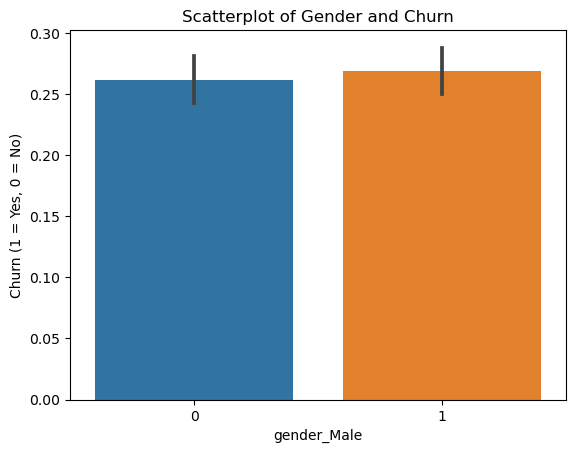

In [13]:
#Does gender affect churn?

sns.barplot(x = X_train.gender_Male , y = y_train.churn_Yes, data=df)

# Add labels and title
plt.ylabel('Churn (1 = Yes, 0 = No)')
plt.title('Scatterplot of Gender and Churn')

# Show the plot
plt.show()

In [1]:
observed = pd.crosstab(X_train.gender_Male, y_train.churn_Yes)
observed
print()
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

NameError: name 'pd' is not defined

In [15]:
corr, p = stats.pearsonr(X_train.gender_Male, y_train.churn_Yes)
corr, p

(0.008380977529773714, 0.58602046255272)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


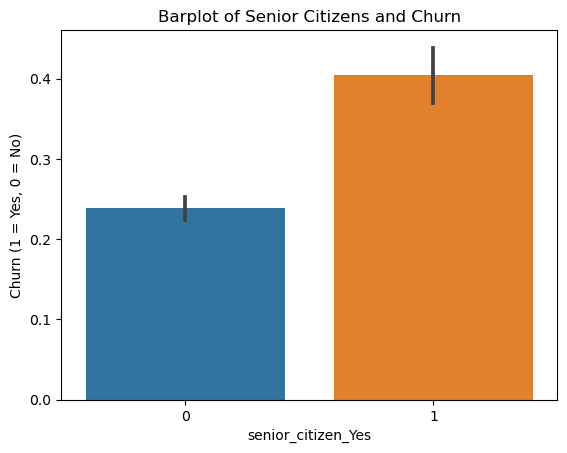

In [16]:
sns.barplot(X_train.senior_citizen_Yes, y_train.churn_Yes, data=df)

# Add labels and title
plt.ylabel('Churn (1 = Yes, 0 = No)')
plt.title('Barplot of Senior Citizens and Churn')

# Show the plot
plt.show()

In [17]:
observed = pd.crosstab(X_train.senior_citizen_Yes, y_train.churn_Yes)
observed
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(80.79361466512287,
 2.505662983276272e-19,
 1,
 array([[2601.48260355,  939.51739645],
        [ 502.51739645,  181.48260355]]))

In [18]:
corr, p = stats.pearsonr(X_train.senior_citizen_Yes, y_train.churn_Yes)
corr, p

(0.1390127109165715, 1.113458833105617e-19)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


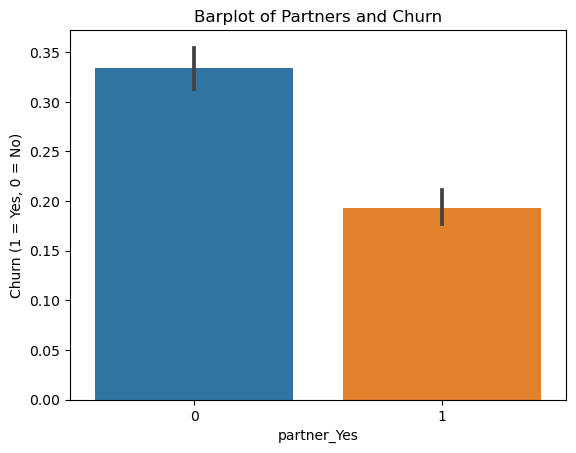

In [19]:
sns.barplot(X_train.partner_Yes, y_train.churn_Yes, data=df)

# Add labels and title
plt.ylabel('Churn (1 = Yes, 0 = No)')
plt.title('Barplot of Partners and Churn')

# Show the plot
plt.show()

In [20]:
observed = pd.crosstab(X_train.partner_Yes, y_train.churn_Yes)
observed
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(106.63124069338238,
 5.362120825511991e-25,
 1,
 array([[1587.63171598,  573.36828402],
        [1516.36828402,  547.63171598]]))

In [21]:
corr, p = stats.pearsonr(X_train.partner_Yes, y_train.churn_Yes)
corr, p

(-0.15940146649612144, 1.9116438006458855e-25)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


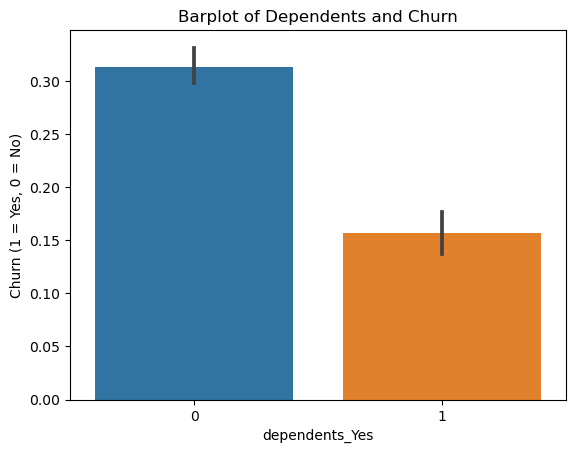

In [22]:
sns.barplot(X_train.dependents_Yes, y_train.churn_Yes)

# Add labels and title
plt.ylabel('Churn (1 = Yes, 0 = No)')
plt.title('Barplot of Dependents and Churn')

# Show the plot
plt.show()

In [23]:
observed = pd.crosstab(X_train.dependents_Yes, y_train.churn_Yes)
observed
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(111.74045071817625,
 4.0728740930257814e-26,
 1,
 array([[2153.33112426,  777.66887574],
        [ 950.66887574,  343.33112426]]))

In [24]:
corr, p = stats.pearsonr(X_train.dependents_Yes, y_train.churn_Yes)
corr, p

(-0.1632082123404583, 1.303375209553967e-26)

In [42]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [43]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
clf.score(X_train, y_train)

0.9981065088757396

## Modeling

In [25]:
#calculated 
baseline_accuracy = (y_train.churn_Yes == 0).mean()
baseline_accuracy

0.7346745562130178

In [26]:
tree = DecisionTreeClassifier()
tree

DecisionTreeClassifier()

In [27]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
tree.predict(X_train)[:5]

array([0, 0, 1, 0, 0], dtype=uint8)

In [29]:
tree.score(X_train, y_train)

0.9981065088757396

In [30]:
y_pred = tree.predict(X_train)

In [32]:
conf = confusion_matrix(y_train, y_pred)
conf

array([[3103,    1],
       [   7, 1114]])

In [35]:
labels = sorted(y_train.churn_Yes.unique())
labels

[0, 1]

In [36]:
pd.DataFrame(conf)

,0,1
0,3103,1
1,7,1114


In [37]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3104
           1       1.00      0.99      1.00      1121

    accuracy                           1.00      4225
   macro avg       1.00      1.00      1.00      4225
weighted avg       1.00      1.00      1.00      4225



In [38]:
conf

array([[3103,    1],
       [   7, 1114]])

In [39]:
conf.ravel()

array([3103,    1,    7, 1114])

In [49]:
TN, FP, FN, TP = conf.ravel()
TN, FP, FN, TP

(3103, 1, 7, 1114)

In [50]:
all_ = (TP + TN + FP + FN)

accruacy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN (FN + TP)

precision = TP / (TP + FP)
f1 = 2 * ((precision * recall) / (precision + recall))

support_pos = TP + FN
support_neg = FP + TN

TypeError: 'numpy.int64' object is not callable

In [ ]:
subset = df[df.prediction == 'coffee']
model_precision = (subset.prediction == subset.actual).mean()

subset = df[df.baseline_prediction == 'coffee']
baseline_precision = (subset.baseline_prediction == subset.actual).mean()

print(f'model precision: {model_precision:.2%}')
print(f'baseline precision: {baseline_precision:.2%}')


In [ ]:
rf = RandomForestClassifier(random_state = 123, min_samples_leaf = 1, max_depth = 10)
rf

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
rf.score(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_train)
y_pred[:5]

In [ ]:
print(classification_report(y_train, y_pred))

Deal with nulls

In [ ]:
y_train

In [ ]:
X_train.head()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import numpy as np
import acquire
import prepare
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

def telco_churned_linear_regression(train, validate, test, list_of_columns, the_C = 1):
    logit1 = LogisticRegression(C =the_C, max_iter=1000)
    logit1
    train
    X_train = train.loc[: , list_of_columns]
    y_train = train.churn_Yes
    X_validate = validate.loc[: , list_of_columns]
    y_validate = validate.churn_Yes
    X_test = test.loc[: , list_of_columns]
    y_test = test.churn_Yes
    logit1.fit(X_train, y_train)
    train_score = logit1.score(X_train, y_train)
    validate_score = logit1.score(X_validate, y_validate)
    test_score = logit1.score(X_test, y_test)
    return train_score, validate_score, test_score

dict_for_dataframe = {}
df = acq.prep_telco()
df['churn_Yes'] = df['churn_Yes'].replace(np.nan,0)
train, validate, test = acq.test_train(df, 'churn_Yes')
list_of_columns = train.columns
the_c_list = [.01, .1, 1, 10, 100, 1000]
train_list = []
validate_list = []
features= []

for c_value in the_c_list:
    for num_cols in range(2, len(list_of_columns)+1):
        for i in itertools.combinations(list_of_columns, num_cols):
            print(i)
            train_score, validate_score, test_score = telco_churned_linear_regression(train, validate, test, i, the_C = c_value)
            train_list.append(train_score)
            validate_list.append(validate_score)
            features.append(i)
the_dataframe = pd.DataFrame({'train':train_list,
             'validate':validate_list,
             'features':features
             }
             )
the_dataframe['difference'] = abs(the_dataframe.train - the_dataframe.validate)
the_dataframe = the_dataframe.sort_values(by='difference')
print(the_dataframe[the_dataframe.difference > 0])
plt.plot(range(0, len(the_dataframe.train)), the_dataframe.train)
plt.show()

Do plots with y_train, go down the list 1 by one. take the most most correlated features and formulate you questions with it.

In [ ]:
sns.scatterplot(data=df, x='monthly_charges', y='churn_Yes')
plt.show()